In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import VNA_data_read_local as vdr

### Broadband Data 05/30/2025

In [11]:
bb_BL1, bb_disk1 = vdr.loader('broadband_0.06to10.94GHz_baseline2_2025-05-30_13-10-28.txt', 
                              'broadband_0.06to10.94GHz_0.5mm_disk_2025-05-30_13-02-09.txt', 
                              'data_053025')

bb_BL1, bb_disk2 = vdr.loader('broadband_0.06to10.94GHz_baseline2_2025-05-30_13-10-28.txt', 
                              'broadband_0.06to10.94GHz_0.5mm_disk2_2025-05-30_13-02-56.txt', 
                              'data_053025')

bb_BL1, bb_disk3 = vdr.loader('broadband_0.06to10.94GHz_baseline2_2025-05-30_13-10-28.txt', 
                              'broadband_0.06to10.94GHz_0.5mm_disk3_2025-05-30_13-03-27.txt', 
                              'data_053025')

In [24]:

def load_subtract_getfreqs(baseline_filename, disk_res_filename, folder): 
    # loading in
    folder_path = '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/' + folder + '/'
    baseline_data = pd.read_csv(folder_path + baseline_filename)
    baseline_data['Complex (decimal)'] = baseline_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    disk_resonance_data = pd.read_csv(folder_path + disk_res_filename)
    disk_resonance_data['Complex (decimal)'] = disk_resonance_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    # separating into arrays
    freqs = np.array(1e-9*baseline_data['Freq (Hz)'])
    baseline = np.array(20*np.log10(np.abs(baseline_data['Complex (decimal)'])))
    disk = np.array(20*np.log10(np.abs(disk_resonance_data['Complex (decimal)'])))
    baseline_subtracted = np.array(disk - baseline)
    return freqs, baseline, disk, baseline_subtracted

In [29]:
bb_freqs, bb_bl1, disk1_p5mm, bb_sub1_p5mm = load_subtract_getfreqs('broadband_0.06to10.94GHz_baseline2_2025-05-30_13-10-28.txt', 
                              'broadband_0.06to10.94GHz_0.5mm_disk_2025-05-30_13-02-09.txt', 
                              'data_053025')

In [34]:
bb_freqs_VC, bb_bl1_VC, disk1_VC, bb_sub1_VC = load_subtract_getfreqs('broadband_0.06to10.94GHz_baseline3_2025-05-30_13-11-15.txt',
                                                                       'broadband_0.06to10.94GHz_veryclose_disk1_2025-05-30_13-40-51.txt', 
                                                                       'data_053025')

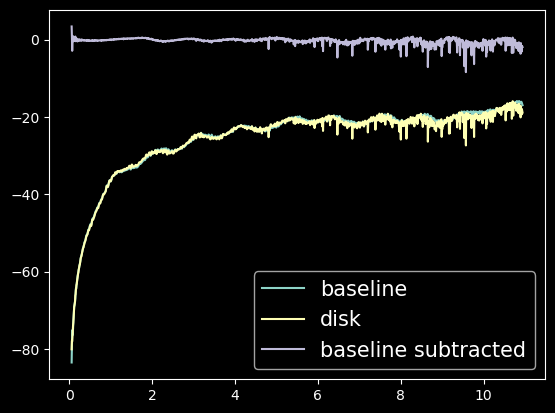

In [33]:
plt.plot(bb_freqs, bb_bl1, label = 'baseline')
plt.plot(bb_freqs, disk1_p5mm, label = 'disk')
plt.plot(bb_freqs, bb_sub1_p5mm, label = 'baseline subtracted')
plt.legend()


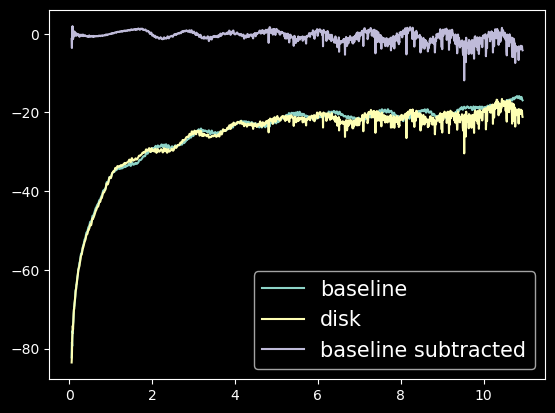

In [35]:
plt.plot(bb_freqs_VC, bb_bl1_VC, label = 'baseline')
plt.plot(bb_freqs, disk1_VC, label = 'disk')
plt.plot(bb_freqs, bb_sub1_VC, label = 'baseline subtracted')
plt.legend()